In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm # sm.OLS(). 사용하지는 않음
import statsmodels.formula.api as smf # smf.ols()
import scipy.stats as stats
import matplotlib.pyplot as plt

<OLS 직접 구현OLS 직접 구현 (simulated data)>

- sample data 생성

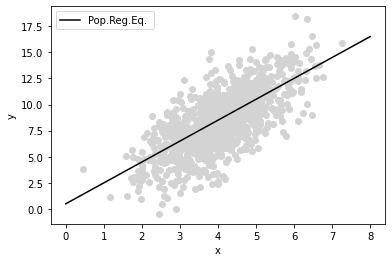

In [2]:
# DGP (true parameters): y = b1 + b2*x + e
b1 = 0.5 # b1
b2 = 2 # b2
sig = 2 # sigma

# Drawing a sample of size n
np.random.seed(20160049)
n = 1000
x = stats.norm.rvs(4, 1, size=n) # N(4,1^2)
e = stats.norm.rvs(0, sig, size=n) # N(0,sig^2)
y = b1 + b2*x + e

# Graph
xmin = np.floor(np.min(x)) # 정수 자리로 내림
xmax = np.ceil(np.max(x)) # 정수 자리로 올림 = b1 + b2*x + e
x_range = np.linspace(xmin, xmax, num=100)
y_con_range = b1 + b2*x_range # E(y[x])

plt.plot(x, y, color='lightgrey', marker='o', linestyle='')
plt.plot(x_range, y_con_range, color='black', label='Pop.Reg.Eq. ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- OLS (manual calculation)

b2_hat = 2.0447 (방법 1)
b2_hat = 2.0447 (방법 2)
b1_hat = 0.1263


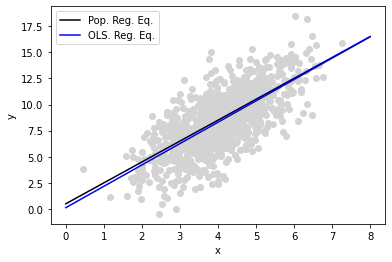

In [3]:
# b2_hat (방법 1) 
x_bar = np.mean(x)
y_bar = np.mean(y)
x_demean = x - x_bar
y_demean = y - y_bar
sum_xx = np.sum(x_demean*x_demean) # Σ(x_i - x_bar)^2
sum_xy = np.sum(x_demean*y_demean) # Σ(x_i - x_bar)*(y_i - y_bar)

b2_hat = sum_xy / sum_xx
print('b2_hat =', np.round(b2_hat, 4), '(방법 1)')

# b2_hat (방법 2) 분산 공분산을 통해 산출
cov_xy = np.cov(x, y)[1, 0] # sample cov이기 때문에 n-1이 디폴트 # 분산-공분산 행렬의 (2, 1) 원소
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

b2_hat = cov_xy / var_x
print('b2_hat =', np.round(b2_hat, 4), '(방법 2)')

# b1_hat
b1_hat = y_bar - b2_hat*x_bar
print('b1_hat =', np.round(b1_hat, 4))

# Graph
y_hat_range = b1_hat + b2_hat*x_range

plt.plot(x, y, color='lightgrey', marker='o', linestyle='')
plt.plot(x_range, y_con_range, color='black', label='Pop. Reg. Eq.') 
plt.plot(x_range, y_hat_range, color='blue', label='OLS. Reg. Eq.') 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show() 

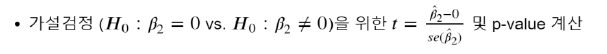

In [4]:
# Standard error of b2_hat
y_hat = b1_hat + b2_hat*x # y_hat_range와 헷갈리지 말 것
e_hat = y - y_hat
sse = sum(e_hat**2) # 잔차제곱합 
sig_hat = np.sqrt(sse/(n-2)) # df=2 추정해야하는 모수가 2개(β1_hat, β2_hat)이기 때문에 자유도가 2개 감소

se_b2_hat = sig_hat/np.sqrt(sum_xx) 
print("se = ", round(se_b2_hat, 4)) 

# t-value 
t_val = b2_hat/se_b2_hat
print("t-value = ", round(t_val, 4)) 

# p-value 
p_val_two = 2*(1 - stats.t.cdf (np.abs(t_val), n-2))
print("p-value = ", round(p_val_two, 4)) 

se =  0.0662
t-value =  30.8795
p-value =  0.0


- R², Adjusted R²

In [5]:
SST = sum((y - y_bar ) **2)      # 다른 이름: TSS
SSR = sum((y_hat - y_bar ) **2)  # 다른 이름: ESS
SSE = sum( (y - y_hat)**2)       # 다른 이름: RSS
          
R2 = 1 - SSE/SST
print("R2 = ", round(R2,4))

R2 = SSR/SST
print("R2 = ", round(R2,4)) # 같은지 확인

SST_adj = SST/(n-1) # 자유도로 나눔
SSE_adj = SSE/(n-2) # 자유도로 나눔 (SSE를 구하기 위해서는 자유도가 2개 상실)
R2_adj = 1 - SSE_adj/SST_adj

print("adjusted R2 = ", round(R2_adj, 4))

R2 =  0.4886
R2 =  0.4886
adjusted R2 =  0.4881


In [6]:
# 데이터프레임 정의
df = pd. DataFrame({ 'y': y, 'x': x})
df.head()

,y,x
0,5.505132,2.543831
1,15.269848,6.383582
2,11.298419,4.435774
3,5.779253,4.651411
4,14.323783,3.758652


In [7]:
# OLS 추정
model = smf.ols(formula='y ~ x', data=df) # R 스타일로 코드 작성 가능
# model = smf.ols(formula='y - x-t', data=df) # no intercept
# model = smf.o/s(formula='y~0 + x', data=df) # no intercept
results = model.fit(use_t=1) # p-value 계산 시 t 분포 사용
print (results. summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     953.5
Date:                Sun, 28 Mar 2021   Prob (F-statistic):          1.68e-147
Time:                        18:26:36   Log-Likelihood:                -2143.9
No. Observations:                1000   AIC:                             4292.
Df Residuals:                     998   BIC:                             4302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1263      0.275      0.459      0.6

In [8]:
# 저장된 추정결과 목록
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [9]:
# 자주 사용되는 추정결과들 
print('Parameters:')
print (round(results.params, 4), 'Wn')

print('Standard errors:')
print (round(results.bse, 4), 'Wn')

print('t-values:')
print (round(results.tvalues, 4), 'Wn')

print('p-values:')
print (round(results.pvalues, 4), 'Wn')

print('R2: ', round(results.rsquared, 4), 'Wn')

print('Residuals:')
print (results.resid)

print('Residuals:')
print (results.fittedvalues)

Parameters:
Intercept    0.1263
x            2.0447
dtype: float64 Wn
Standard errors:
Intercept    0.2750
x            0.0662
dtype: float64 Wn
t-values:
Intercept     0.4593
x            30.8795
dtype: float64 Wn
p-values:
Intercept    0.6461
x            0.0000
dtype: float64 Wn
R2:  0.4886 Wn
Residuals:
0      0.177593
1      2.091335
2      2.102504
3     -3.857564
4      6.512352
         ...   
995   -0.825027
996   -1.644328
997    1.633422
998   -3.179655
999    0.027107
Length: 1000, dtype: float64
Residuals:
0       5.327539
1      13.178513
2       9.195914
3       9.636816
4       7.811431
         ...    
995     7.796464
996     8.187764
997     6.275578
998     8.345843
999     8.525597
Length: 1000, dtype: float64


<Data 예제 1> 
- 질문 : 기업의 ROE가 CEO의 salary에 영향을 주는가?
- 데이터 : 1990년 미국 208개 기업의 CEO salary와 ROE
- 출처 : Random sample from May 6, 1991 issue of Businessweek
- y : salary
- x :  ROE

In [10]:
ceosal1 = pd.read_excel ('./ceosal1.xlsx') # data 파일은 코드와 동일한 폴더에 위치
ceosal1.head() 

,Obs.,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,2,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,3,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,4,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,5,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [11]:
# EDA: 요약 통계량 (Summary statistics, Descriptive statistics)
ceosal1.describe()

,Obs.,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,105.000000,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,60.477268,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,1.000000,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,53.000000,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,105.000000,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,157.000000,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,209.000000,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


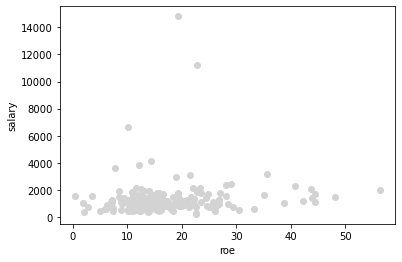

In [12]:
# EDA: 산포도 산포도 (Scatter plot)
plt.plot('roe', 'salary', data=ceosal1, color='lightgrey', marker='o', linestyle='')
plt.xlabel('roe')
plt.ylabel('salary') 
plt.show()

In [13]:
# OLS 
#model = smf.ols(formula='salary ~ roe', data=ceosal1) 

y = ceosal1['salary']
x = ceosal1['roe']
model = smf.ols(formula='y ~ x', data=ceosal1)
results = model.fit()

print (results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sun, 28 Mar 2021   Prob (F-statistic):             0.0978
Time:                        18:26:40   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

In [ ]:
'''
해석:
    1.ROE는 90% 신뢰 수준에서 CEO의 salary에 유의한 영향을 준다. 
    2. ROE 1%p 상승 시 CEO의 salary는 평균적으로 $18,501 증가한다. 
'''

In [14]:
# 추정 결과를 Table로 직접 정리해보기
Table = pd. DataFrame({ 'b_hat': round(results.params, 4), 
                       'se': round(results.bse, 4), 
                       't_val': round(results.tvalues, 4), 
                       'p_val': round(results.pvalues, 4), 
                       'R2': round(results.rsquared,4)})

Table # 시험 볼 때 이렇게 정리해서 제출

,b_hat,se,t_val,p_val,R2
Intercept,963.1913,213.2403,4.5169,0.0000,0.0132
x,18.5012,11.1233,1.6633,0.0978,0.0132


In [15]:
# 세 가지 방법으로 R2 계산해보기
salary = ceosal1['salary']
salary_hat = results.fittedvalues
e_hat = results.resid

R2_a = np.var(salary_hat) / np.var(salary) 
R2_b = 1 - np.var(e_hat) / np.var(salary) 
R2_c = np.corrcoef(salary, salary_hat)[1, 0]**2 

print("R2: ", round(R2_a, 4), "/", round(R2_b, 4), "/", round(R2_c, 4))

R2:  0.0132 / 0.0132 / 0.0132


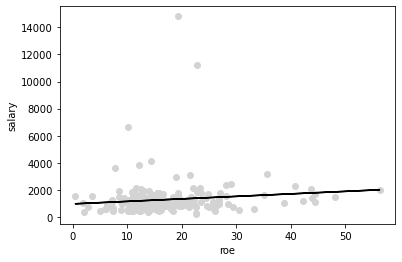

In [16]:
# 모형 적합 그래프
plt.plot('roe', 'salary', data=ceosal1, color='lightgrey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], salary_hat, color='black', marker='', linestyle='-')
plt.xlabel('roe')
plt.ylabel('salary')
plt.show() # 회사의 규모, 매출사이즈 팩터를 통제하지 못한 결과

In [17]:
# 원자료, 예측치, 잔차를 한 개의 Table에 정리하기
DataTable = pd. DataFrame({ 'roe': ceosal1['roe'],
                           'salary': ceosal1['salary'], 
                           'salary_hat': salary_hat, 
                           'e_hat': e_hat})
DataTable.head()

,roe,salary,salary_hat,e_hat
0,14.1,1095,1224.058071,-129.058071
1,10.9,1001,1164.854261,-163.854261
2,23.5,1122,1397.969216,-275.969216
3,5.9,578,1072.348338,-494.348338
4,13.8,1368,1218.507712,149.492288


In [18]:
# 절편(intercept)이 없는 모형(y = b*x + e)으로 적합해보기
model2 = smf.ols(formula='salary ~ 0 + roe', data=ceosal1)
results2 = model2.fit() 

Table2 = pd. DataFrame({ 'b_hat': round(results2.params, 4), 
                       'se': round(results2.bse, 4), 
                       't_val': round(results2.tvalues, 4), 
                       'p_val': round(results2.pvalues, 4), 
                       'R2': round(results2.rsquared,4)})
Table2

,b_hat,se,t_val,p_val,R2
roe,63.538,5.1556,12.324,0.0,0.422


In [19]:
# 절편만 있는 모형(y = b + e)으로 적합해보기

model3 = smf.ols(formula='salary ~ 1', data=ceosal1)
results3 = model3. fit()

Table3 = pd. DataFrame({ 'b_hat': round(results3.params, 4),
                        'se': round(results3.bse, 4),
                        't_val': round(results3.tvalues, 4),
                        'p_val': round(results3.pvalues, 4),
                        'R2': round(results3.rsquared,4)}) 
Table3 

,b_hat,se,t_val,p_val,R2
Intercept,1281.1196,94.9271,13.4958,0.0,-0.0


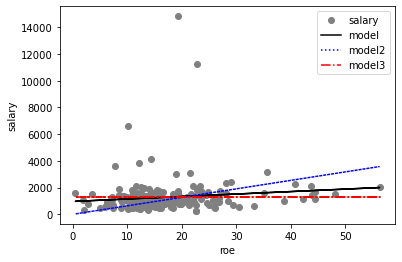

In [20]:
# 세 가지 모형의 적합 결과를 그래프로 비교

plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-', label='model')
plt.plot(ceosal1['roe'], results2.fittedvalues, color='blue', linestyle=':', label='model2')
plt.plot(ceosal1['roe'], results3.fittedvalues, color='red', linestyle='-.', label='model3')
plt.ylabel('salary') 
plt.xlabel('roe')
plt.legend()
plt.show() 

In [ ]:
'''
    Q1> 세 가지 모형의 적합 결과가 다른데.. 최종 결론을 어떻게 내려야 하는가 ...?
     A> 분석 목적에 따라 다르다. 우리의 질문은 roe 와 salary 사이의 관계 유무를 살펴보는 것이었다. 
        => R2가 아니라 roe 회귀계수의 t-value에 의미를 두어야 한다. 

    Q2> 모형을 맞게 설정한 것일까...? 
     A> ... 
'''

- β2 해석

In [21]:
# log-level 스케일로 적합해보기
model4 = smf.ols(formula= 'np.log(salary) ~ roe', data=ceosal1)
print(model4.fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     9.408
Date:                Sun, 28 Mar 2021   Prob (F-statistic):            0.00245
Time:                        18:26:52   Log-Likelihood:                -172.60
No. Observations:                 209   AIC:                             349.2
Df Residuals:                     207   BIC:                             355.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7122      0.087     77.468      0.0

In [ ]:
'''
해석: 
1. ROE는 99% 신뢰수준(1% 유의 수준)에서 CEO의 salary에 유의한 영향을 준다.
2. ROE 1%p 상승 시 CEO의 salary는 평균적으로 1.39% 증가한다. 
    (Δy/y ≒ b2*Δx) 
'''

In [23]:
# 설명변수를 sales로 바꿔서 분석해보기: log-log 스케일 모형이 적절하다.
model5 = smf.ols(formula='np.log(salary) ~ np.log(sales)', data=ceosal1)
print(model5.fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.70e-12
Time:                        18:26:53   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8220      0.288     16.723

In [ ]:
'''
해석:
    1. sales는 95% 신뢰수준(5% 유의수준)에서 CEO의 salary에 유의한 영향을 준다.
    2. sales 1% 상승 시 CEO의 salary는 평균적으로 0.2567% 증가한다.
    (Δy/y ≒ b2*Δx/x => b2는 탄력도) 
'''

<Data 예제 2>

궁금증: Does a mutual fund beat the market? (Jensen's α)

In [25]:
# Data
capm = pd. read_excel('./capm.xlsx', header=0, index_col='Date') # 날짜를 index로 사용
capm

,SnP500,Fund1,Fund2,Fund3,Fund4,USTB3M
Date,,,,,,
2002-01-31,1130.199951,15.30,37.150002,31.855000,17.260000,1.68
2002-02-28,1106.729980,14.88,38.500000,29.170000,16.620001,1.76
2002-03-31,1147.390015,16.49,37.400002,30.155001,12.800000,1.83
2002-04-30,1076.920044,16.00,31.549999,26.129999,10.040000,1.75
2002-05-31,1067.140015,17.65,31.139999,25.455000,7.920000,1.76
...,...,...,...,...,...,...
2017-10-31,2583.209961,12.27,20.160000,83.180000,50.900002,1.09
2017-11-30,2645.100098,12.52,18.290001,84.169998,49.060001,1.25
2017-12-31,2683.729980,12.49,17.450001,85.540001,47.279999,1.34


In [26]:
# 보유기간 수익률(Holding period returns)
fundname = 'Fund4'
Rm = capm['SnP500'].pct_change()*100 # market return (%)
Ri = capm[fundname].pct_change()*100 # fund return in (%)
Rf = capm['USTB3M'].shift(1)/12      # risk-free return (%)

returns = pd.concat([Rm, Ri, Rf], axis=1).dropna() # 옆으로 붙인 후 결측값이 있는 행 삭제
display(returns)

,SnP500,Fund4,USTB3M
Date,,,
2002-02-28,-2.076621,-3.707990,0.140000
2002-03-31,3.673889,-22.984361,0.146667
2002-04-30,-6.141763,-21.562500,0.152500
2002-05-31,-0.908148,-21.115538,0.145833
2002-06-30,-7.245535,19.570707,0.146667
...,...,...,...
2017-10-31,2.459544,5.274052,0.087500
2017-11-30,2.395862,-3.614933,0.090833
2017-12-31,1.460432,-3.628214,0.104167


In [27]:
# EDA: 요약통계량
display(round(returns.describe(), 2))

,SnP500,Fund4,USTB3M
count,193.00,193.00,193.00
mean,0.54,0.86,0.10
std,4.07,7.80,0.13
min,-16.79,-22.98,0.00
25%,-1.66,-4.25,0.01
50%,1.11,1.09,0.04
75%,2.93,5.34,0.14
max,10.59,29.64,0.43


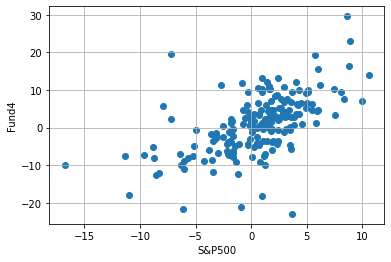

In [28]:
# EDA: 산포도
plt.scatter(Rm, Ri)
plt.xlabel('S&P500') 
plt.ylabel(fundname)
plt.grid(True)
plt.show()

In [29]:
# 초과수익률 (Excess returns)
exreturns = pd.concat([Rm-Rf, Ri-Rf], axis=1).dropna() 
exreturns.columns = (['SnP500', 'Fund'])

exreturns

,SnP500,Fund
Date,,
2002-02-28,-2.216621,-3.847990
2002-03-31,3.527223,-23.131027
2002-04-30,-6.294263,-21.715000
2002-05-31,-1.053981,-21.261371
2002-06-30,-7.392202,19.424040
...,...,...
2017-10-31,2.372044,5.186552
2017-11-30,2.305028,-3.705766
2017-12-31,1.356265,-3.732381


In [30]:
# 요인분석 (Factor analysis): Ri - Rf = a + B*(Ri - Rf) + e

model = smf.ols(formula='Fund ~ SnP500', data=exreturns) 
results = model.fit()

print (results. summary())

                            OLS Regression Results                            
Dep. Variable:                   Fund   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     98.16
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           6.18e-19
Time:                        18:27:21   Log-Likelihood:                -629.82
No. Observations:                 193   AIC:                             1264.
Df Residuals:                     191   BIC:                             1270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2744      0.460      0.596      0.5

In [ ]:
'''
해석:
    1. 95% 신뢰수준(5% 유의수준)에서 펀드수익률의 시장(SnP500수익률) 대비 초과수익률(0.2744%)은 유의하지 못하다. 
    2. 절편이 양수이므로 평균적으로 시장보다 수익이 더 잘 나왔으나, 
       Fund수익률은 시장 대비 부담한 위험이 10% 더 높아 성과의 우수성을 입증할 수 없다.(높은 변동성 대비 얻는 수익↓)
'''